In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

讀入資料<br/>
MNIST 是有一堆 0-9 的手寫數字圖庫。有 6 萬筆訓練資料, 1 萬筆測試資料。<br/>它是 "Modified" 版的 NIST 數據庫, 原來的版本有更多資料。<br/>這個 Modified 的版本是由 LeCun, Cortes, 及 Burges 等人做的。<br/>可以參考這個數據庫的[原始網頁](http://yann.lecun.com/exdb/mnist/)。
<br/>
    "MNIST 可以說是 Deep Learning 最有名的範例, 它被 Deep Learning 大師 Hinton 稱為「機器學習的果蠅」。"

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(x_train, y_train),( x_test, y_test) = mnist.load_data()

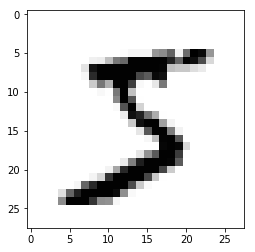

In [4]:
plt.imshow(x_train[0],cmap='Greys')

In [5]:
backup=x_train
interact(lambda x:plt.imshow(backup[int(x)],cmap='Greys'),x=(0,6000))

interactive(children=(IntSlider(value=3000, description='x', max=6000), Output()), _dom_classes=('widget-inter…

<function __main__.<lambda>>

In [0]:
from keras.models import model_from_json
from keras.optimizers import SGD

In [7]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

In [0]:
from keras.utils import np_utils

In [10]:
y_train[0]

5

In [0]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Dense(5,input_dim=784)) #第一層有三個
model.add(Activation('sigmoid')) #第一層用sigmod

In [0]:
model.add(Dense(10)) #第二層有三個
model.add(Activation('sigmoid')) #第一層用selu

In [0]:
model.add(Dense(15)) #第3層有三個
model.add(Activation('sigmoid')) #第一層用selu

In [0]:
model.add(Dense(15)) #第4層有15個
model.add(Activation('relu')) #第一層用relu

In [0]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 3925      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
activation_2 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                60        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)                165       
_________________________________________________________________
activation_4 (Activation)    (None, 15)                0         
__________

開始訓練

In [30]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0396 - acc: 0.7571
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0384 - acc: 0.7651
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0419 - acc: 0.7308
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0408 - acc: 0.7344
Epoch 5/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0408 - acc: 0.7465
Epoch 6/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0405 - acc: 0.7482
Epoch 7/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0394 - acc: 0.7544
Epoch 8/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0388 - acc: 0.7630
Epoch 9/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0394 - acc: 0.7615
Epoch 10/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0373 - acc: 0.7727

In [0]:
predict = model.predict_classes(x_test)

In [32]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 37us/step


In [35]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.03698580948412419
正確率 0.7709


In [0]:
import time
def test(num):
  num=int(num)
  plt.imshow(x_test[num].reshape(28,28),cmap='Greys')
  print('neural network think it is: ', predict[num])

648
neural network think it is:  9


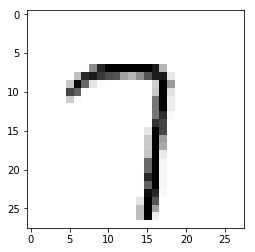

neural network think it is:  6


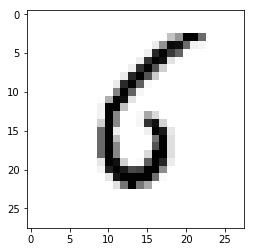

neural network think it is:  9


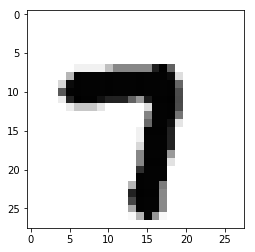

neural network think it is:  1


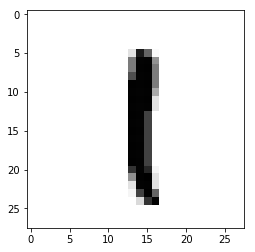

neural network think it is:  2


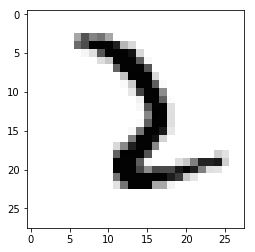

neural network think it is:  5


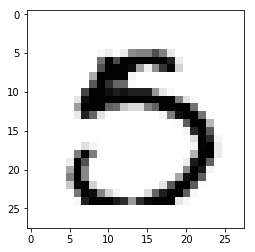

neural network think it is:  8


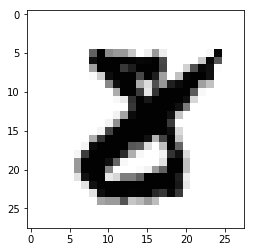

neural network think it is:  0


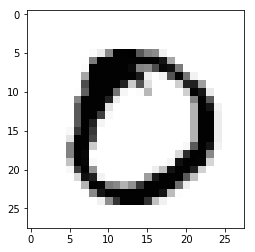

neural network think it is:  3


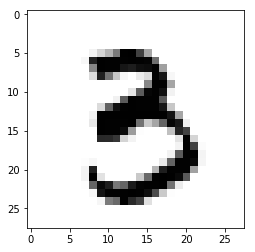

neural network think it is:  4


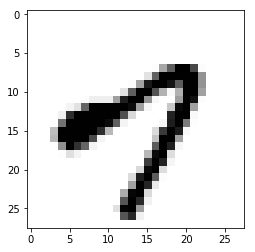

In [54]:
x=input()
for i in range(10):
  #test(x)
  time.sleep(2)
  x=int(x)+1
  print('neural network think it is: ', predict[x])
  plt.imshow(x_test[x].reshape(28,28),cmap='Greys')
  plt.show()